# 내 데이터로 회귀모형 만들기
- 경영정보학과 60171100 윤민혁
- https://www.kaggle.com/bluemumin/kbo-baseball-for-kaggle
- 타자 지표에 따른 war 분석

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/kbo.csv', encoding='utf-8-sig')
df

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,이원석,32.0,128.0,543.0,479.0,74.0,144.0,30.0,1.0,20.0,...,3루수,93.0,59.0,0.301,0.374,0.493,0.867,2019,395.0,0.768
1909,조용호,28.0,68.0,225.0,191.0,34.0,52.0,7.0,1.0,0.0,...,우익수,44.0,28.0,0.272,0.365,0.319,0.684,2018,13.0,0.154
1910,조용호,29.0,16.0,14.0,13.0,4.0,1.0,0.0,0.0,0.0,...,우익수,1.0,0.0,0.077,0.077,0.077,0.154,2019,188.0,0.720
1911,히메네스,27.0,70.0,299.0,279.0,37.0,87.0,17.0,2.0,11.0,...,3루수,57.0,16.0,0.312,0.344,0.505,0.849,2016,523.0,0.889


In [3]:
df.isnull().sum()

batter_name     0
age             0
G               0
PA              0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
TB              0
RBI             0
SB              0
CS              0
BB              0
HBP             0
GB              0
SO              0
GDP             0
BU              0
fly             0
year            0
salary          0
war             0
year_born       0
hand2           0
cp              0
tp              0
1B              0
FBP             0
avg            14
OBP            12
SLG            14
OPS            14
p_year          0
YAB             0
YOPS           15
dtype: int64

In [4]:
df = df.dropna(axis = 0)

In [5]:
df.columns

Index(['batter_name', 'age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'GB', 'SO', 'GDP', 'BU', 'fly', 'year',
       'salary', 'war', 'year_born', 'hand2', 'cp', 'tp', '1B', 'FBP', 'avg',
       'OBP', 'SLG', 'OPS', 'p_year', 'YAB', 'YOPS'],
      dtype='object')

In [6]:
X = df.drop(['batter_name','age','PA','GB','SO','GDP','BU','year','war',
             'year_born','hand2','cp','tp','FBP','p_year','YAB','YOPS'], axis=1)
y = df[['war']]

In [14]:
X

,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,fly,salary,1B,avg,OBP,SLG,OPS
0,26.0,52.0,4.0,9.0,4.0,0.0,0.0,13.0,3.0,0.0,0.0,6.0,0.0,0.0,2500,5.0,0.173,0.259,0.250,0.509
1,47.0,79.0,8.0,14.0,2.0,0.0,4.0,28.0,10.0,0.0,0.0,5.0,0.0,0.0,2900,8.0,0.177,0.226,0.354,0.580
2,65.0,154.0,22.0,36.0,6.0,0.0,10.0,72.0,30.0,3.0,1.0,19.0,1.0,3.0,6000,20.0,0.234,0.316,0.468,0.784
3,80.0,174.0,12.0,34.0,7.0,0.0,4.0,53.0,15.0,2.0,1.0,19.0,1.0,2.0,6000,23.0,0.195,0.276,0.305,0.581
4,15.0,17.0,2.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,0.0,0.0,5500,3.0,0.176,0.300,0.176,0.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,128.0,479.0,74.0,144.0,30.0,1.0,20.0,236.0,93.0,2.0,1.0,52.0,7.0,5.0,30000,93.0,0.301,0.374,0.493,0.867
1909,68.0,191.0,34.0,52.0,7.0,1.0,0.0,61.0,10.0,11.0,2.0,25.0,3.0,0.0,3100,44.0,0.272,0.365,0.319,0.684
1910,16.0,13.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6200,1.0,0.077,0.077,0.077,0.154
1911,70.0,279.0,37.0,87.0,17.0,2.0,11.0,141.0,46.0,8.0,2.0,12.0,4.0,4.0,50000,57.0,0.312,0.344,0.505,0.849


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

## 모델 적합

In [8]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

## 회귀모형을 통한 예측

In [9]:
X.columns

Index(['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB',
       'HBP', 'fly', 'salary', '1B', 'avg', 'OBP', 'SLG', 'OPS'],
      dtype='object')

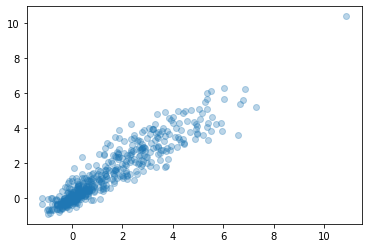

In [10]:
y_pred = mlr.predict(X_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha = 0.3)
plt.show()

## 회귀계수

In [11]:
print(mlr.coef_)
print(mlr.intercept_)

[[-4.35540641e-03 -1.70027802e-02 -1.08431511e-02  2.25157814e-02
   7.19961189e-03  1.52897544e-02 -9.81486392e-03  3.08503102e-02
  -5.51555771e-03  2.99045134e-02 -2.22120484e-02  3.78208102e-02
   5.62049013e-02  6.67487674e-03 -6.32686286e-06  9.84127902e-03
   2.41947688e-01 -2.25217111e-01  1.33362509e-01 -9.18546020e-02]]
[0.02969761]


## 성능평가

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print('MAE : %.2f'%mae)
print('MSE : %.2f'%mse)
print('RMSE : %.2f'%rmse)
print('R2 : %.2f'%r2)

MAE : 0.41
MSE : 0.37
RMSE : 0.60
R2 : 0.88


- 예측값과 실제값의 차이가 적으며 88%정도의 설명력을 나타내고 있다.